In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [64]:
def plot_line(df, ax, label, groupedby, agg_feat, is_expanding):
    if is_expanding:
        df.groupby([groupedby]).mean()[agg_feat].expanding().sum().plot(ax=ax, label=label, linestyle='--' if label=='kd' else '-')
    else:
        df.groupby([groupedby]).mean()[agg_feat].plot(ax=ax, label=label, linestyle='--' if label=='kd' else '-')


def compare_bars(files, rows, arms_list, title, ylabel, xlabel, groupedby, agg_feat):
    fig, axes = plt.subplots(rows, 1, figsize=(7, 16))
    for i, f in enumerate(files):
        dfs = {}
        csvs = glob.glob(f'.{f}') + glob.glob(f'./kd_and_mcch{f}')
        ax = axes[i]
        arms = arms_list[i]
        for path in csvs:
            df = pd.read_csv(path)
            if 'sim_' in path:
                if 'with_temp' in path:
                    label = 'Temperature'
                elif 'with_lim_temp' in path:
                    label = 'LimTemp'
                else:
                    exp_const = path[path.find('sim') + 4:path.find('_exp')]
                    sim_num = path[path.find('cost_') + 5:path.find('_sim')]
                    d = path[path.find('arms_') + 5:path.find('_tree')]
                    label = f'U={exp_const}, #sim={sim_num}, d={d}'
            else:
                label = path[path.find('and_mcch/') + 9: path.find('_records')]
            dfs[label] = df.groupby(groupedby).mean()[agg_feat].round(0).value_counts()

        pd.DataFrame(dfs).fillna(0).astype(np.int32).plot(kind='bar', ax=ax)
        ax.set_title(title + str(arms))
        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)
        ax.legend()

    plt.show()


def compare_plots(files, rows, arms_list, title, ylabel, xlabel, groupedby, agg_feat, is_expanding=False, is_regret=False):
    fig, axes = plt.subplots(rows, 1, figsize=(7, 14))

    for i, f in enumerate(files):
        csvs = glob.glob(f'.{f}') + glob.glob(f'./kd_and_mcch{f}')
        ax = axes[i]
        arms = arms_list[i]
        for path in csvs:
            df = pd.read_csv(path)
            if 'sim_' in path:
                if 'with_temp' in path:
                    label = 'Temperature'
                elif 'with_lim_temp' in path:
                    label = 'LimTemp'
                else:
                    exp_const = path[path.find('sim') + 4:path.find('_exp')]
                    sim_num = path[path.find('cost_') + 5:path.find('_sim')]
                    d = path[path.find('arms_') + 5:path.find('_tree')]
                    label = f'U={exp_const}, #sim={sim_num}, d={d}'
            else:
                label = path[path.find('and_mcch/') + 9: path.find('_records')]
                
            if is_regret:
                df['regret'] = df['reward'] - df['query_cost']*df['query_ind']
            
            plot_line(df, ax, label, groupedby, agg_feat, is_expanding)
            
        ax.set_title(title + str(arms))
        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)
        ax.legend()

    plt.show()

# No Costs Results

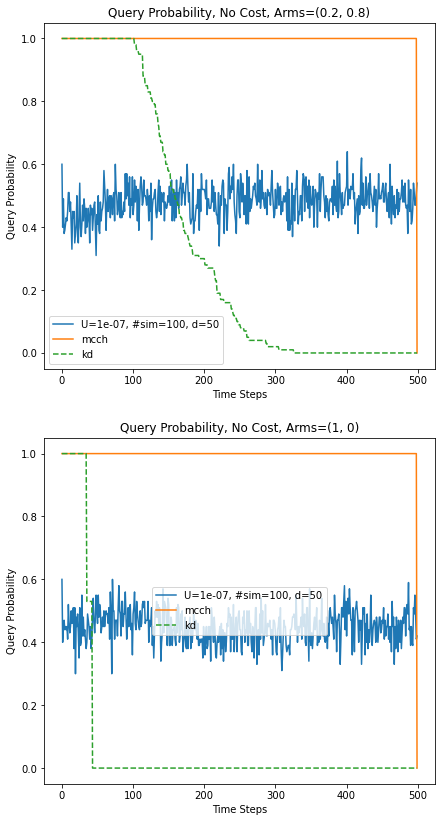

In [36]:
files = ['/*/*/*no_cost*_02_08_*.csv', '/*/*/*no_cost*_1_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)']
rows = len(files)
title = f'Query Probability, No Cost, Arms='
xlabel = 'Time Steps'
ylabel = 'Query Probability'
groupedby = 'timestep'
agg_feat = 'query_ind'

compare_plots(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat)

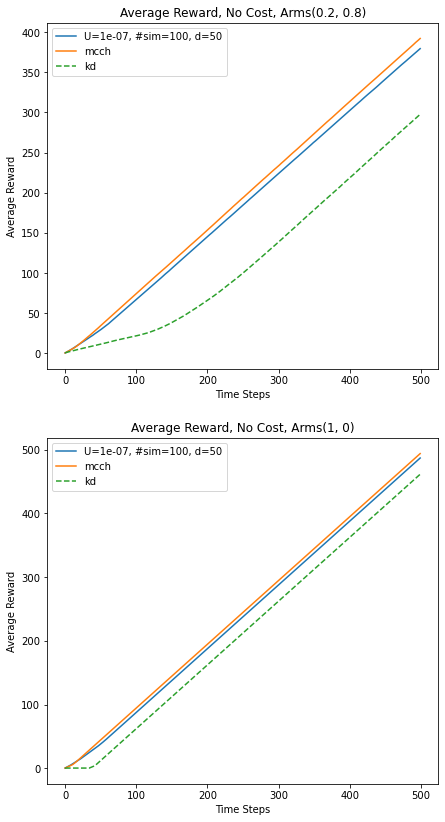

In [37]:
files = ['/*/*/*no_cost*_02_08_*.csv', '/*/*/*no_cost*_1_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)']
rows = len(files)
title = f'Average Reward, No Cost, Arms'
xlabel = 'Time Steps'
ylabel = 'Average Reward'
groupedby = 'timestep'
agg_feat = 'reward'

compare_plots(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat, is_expanding=True)

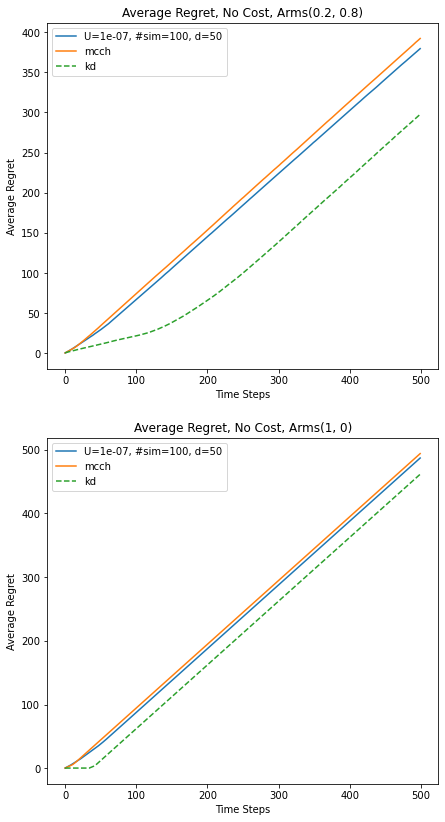

In [38]:
files = ['/*/*/*no_cost*_02_08_*.csv', '/*/*/*no_cost*_1_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)']
rows = len(files)
title = f'Average Regret, No Cost, Arms'
xlabel = 'Time Steps'
ylabel = 'Average Regret'
groupedby = 'timestep'
agg_feat = 'regret'

compare_plots(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat, is_expanding=True, is_regret=True)

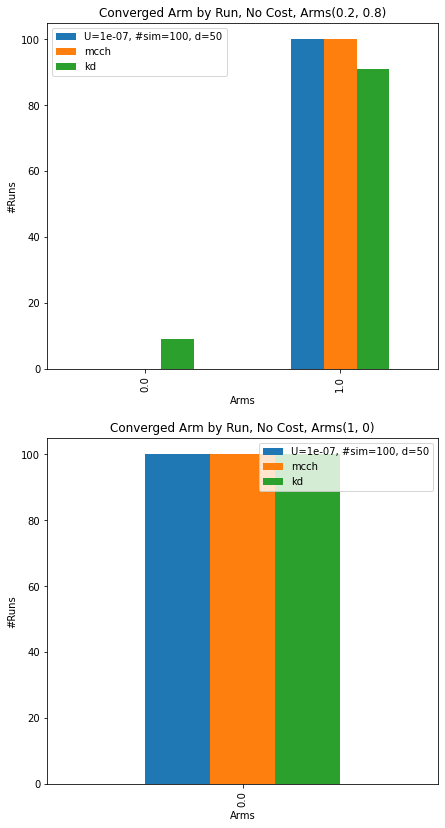

In [39]:
files = ['/*/*/*no_cost*_02_08_*.csv', '/*/*/*no_cost*_1_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)']
rows = len(files)
title = f'Converged Arm by Run, No Cost, Arms'
xlabel = 'Arms'
ylabel = '#Runs'
groupedby = 'run'
agg_feat = 'chosen_arm'

compare_bars(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat)

# Cost = 0.5 Results

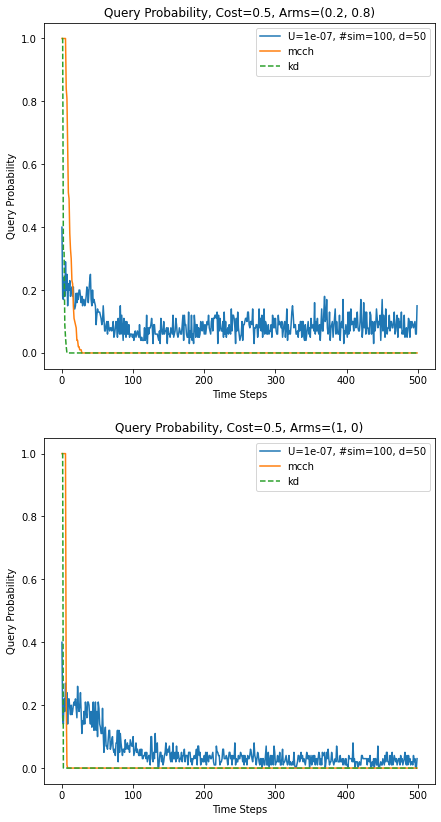

In [40]:
files = ['/*/*/*05_cost*_02_08_*.csv', '/*/*/*05_cost*_1_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)']
rows = len(files)
title = f'Query Probability, Cost=0.5, Arms='
xlabel = 'Time Steps'
ylabel = 'Query Probability'
groupedby = 'timestep'
agg_feat = 'query_ind'

compare_plots(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat)

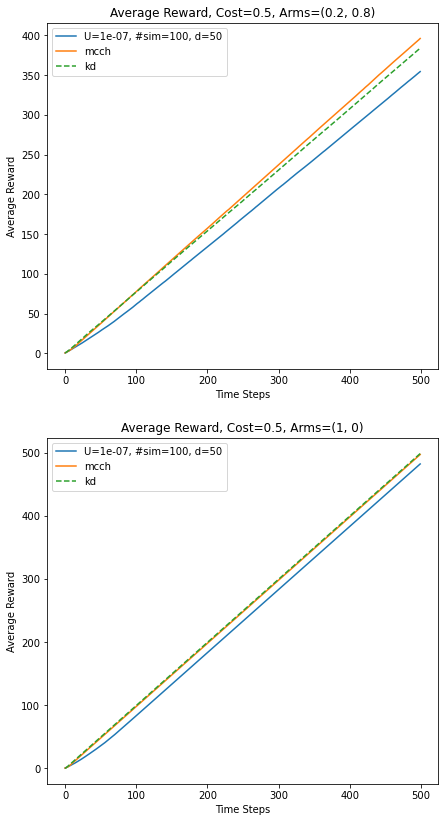

In [41]:
files = ['/*/*/*05_cost*_02_08_*.csv', '/*/*/*05_cost*_1_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)']
rows = len(files)
title = f'Average Reward, Cost=0.5, Arms='
xlabel = 'Time Steps'
ylabel = 'Average Reward'
groupedby = 'timestep'
agg_feat = 'reward'

compare_plots(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat, is_expanding=True)

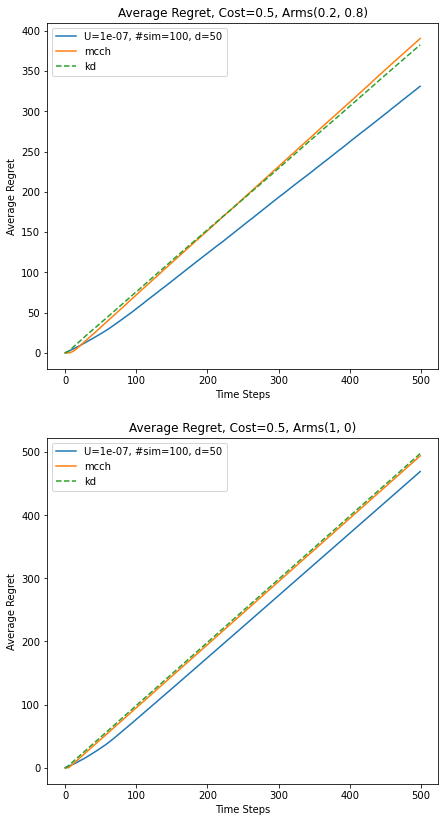

In [42]:
files = ['/*/*/*05_cost*_02_08_*.csv', '/*/*/*05_cost*_1_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)']
rows = len(files)
title = f'Average Regret, Cost=0.5, Arms'
xlabel = 'Time Steps'
ylabel = 'Average Regret'
groupedby = 'timestep'
agg_feat = 'regret'

compare_plots(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat, is_expanding=True, is_regret=True)

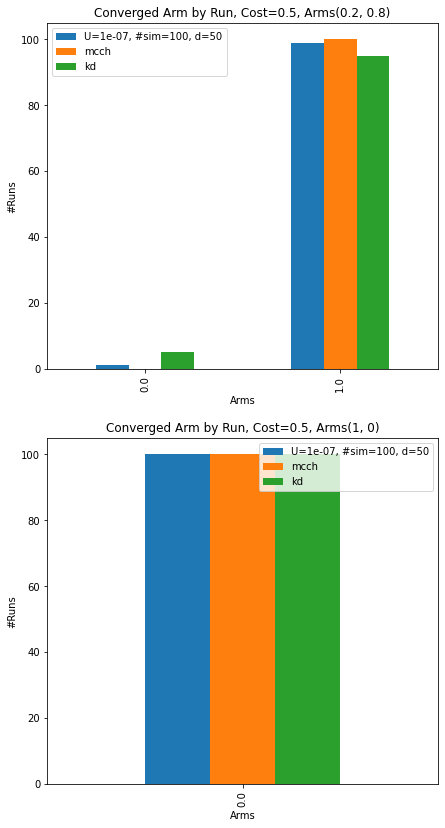

In [43]:
files = ['/*/*/*05_cost*_02_08_*.csv', '/*/*/*05_cost*_1_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)']
rows = len(files)
title = f'Converged Arm by Run, Cost=0.5, Arms'
xlabel = 'Arms'
ylabel = '#Runs'
groupedby = 'run'
agg_feat = 'chosen_arm'

compare_bars(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat)

# Changing Costs Results

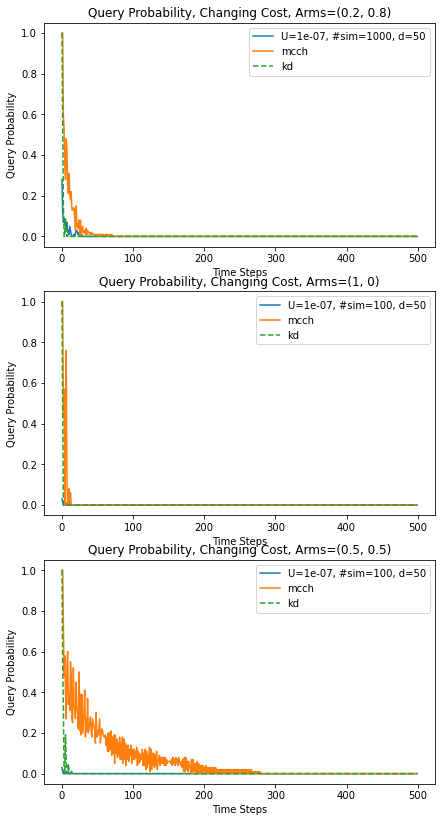

In [44]:
files = ['/*/*/*changing_cost*_02_08_*.csv', '/*/*/*changing_cost*_1_*.csv', '/*/*/*changing_cost*_05_05_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)', '(0.5, 0.5)']
rows = len(files)
title = f'Query Probability, Changing Cost, Arms='
xlabel = 'Time Steps'
ylabel = 'Query Probability'
groupedby = 'timestep'
agg_feat = 'query_ind'

compare_plots(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat)

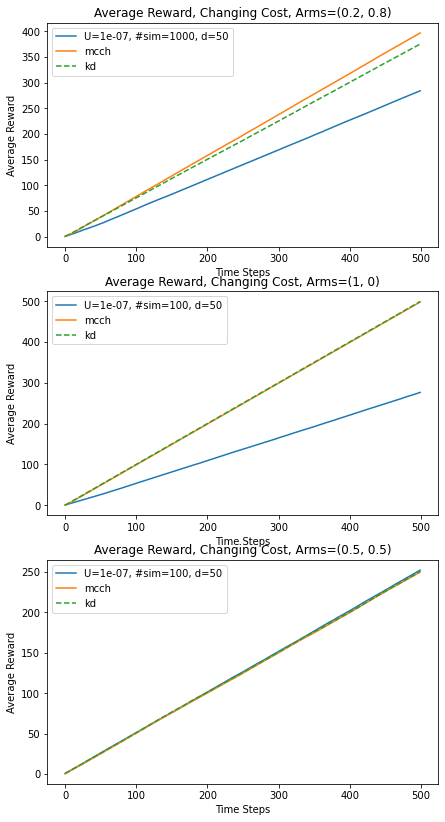

In [45]:
files = ['/*/*/*changing_cost*_02_08_*.csv', '/*/*/*changing_cost*_1_*.csv', '/*/*/*changing_cost*_05_05_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)', '(0.5, 0.5)']
rows = len(files)
title = f'Average Reward, Changing Cost, Arms='
xlabel = 'Time Steps'
ylabel = 'Average Reward'
groupedby = 'timestep'
agg_feat = 'reward'

compare_plots(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat, is_expanding=True)

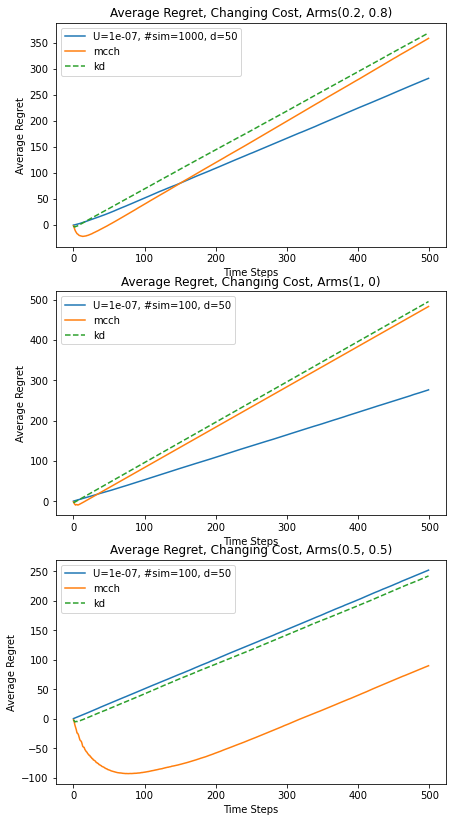

In [46]:
files = ['/*/*/*changing_cost*_02_08_*.csv', '/*/*/*changing_cost*_1_*.csv', '/*/*/*changing_cost*_05_05_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)', '(0.5, 0.5)']
rows = len(files)
title = f'Average Regret, Changing Cost, Arms'
xlabel = 'Time Steps'
ylabel = 'Average Regret'
groupedby = 'timestep'
agg_feat = 'regret'

compare_plots(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat, is_expanding=True, is_regret=True)

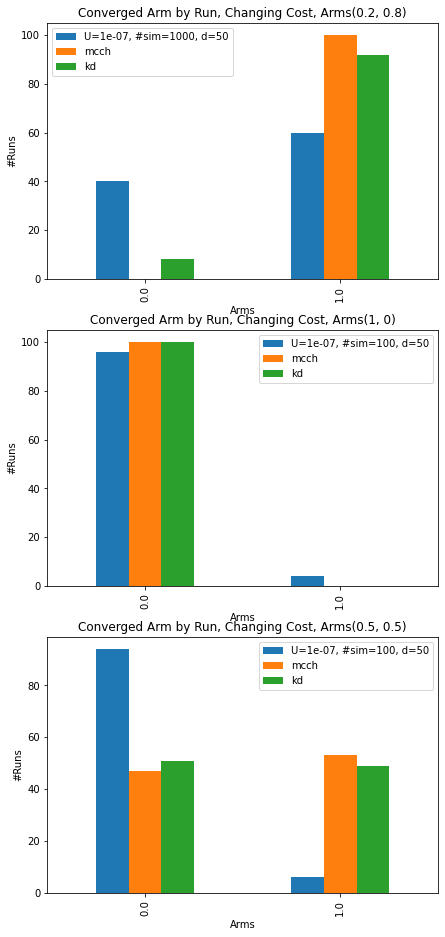

In [65]:
files = ['/*/*/*changing_cost*_02_08_*.csv', '/*/*/*changing_cost*_1_*.csv', '/*/*/*changing_cost*_05_05_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)', '(0.5, 0.5)']
rows = len(files)
title = f'Converged Arm by Run, Changing Cost, Arms'
xlabel = 'Arms'
ylabel = '#Runs'
groupedby = 'run'
agg_feat = 'chosen_arm'

compare_bars(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat)

# With Temperature

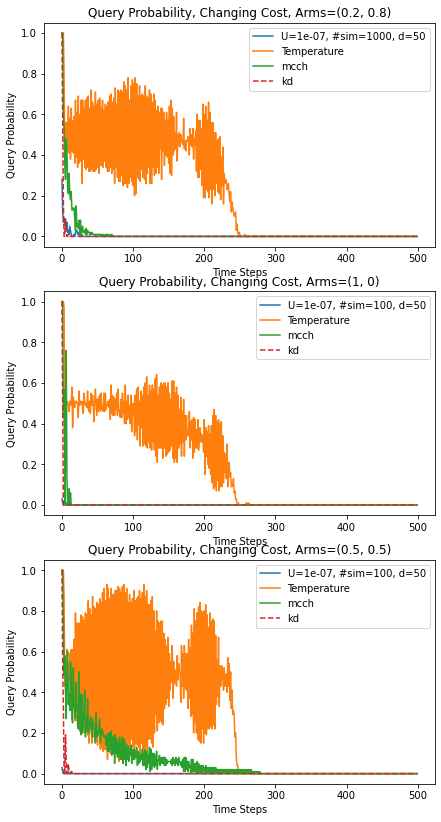

In [56]:
files = ['/*/*/*changing_cost*_02_08_*.csv', '/*/*/*changing_cost*_1_*.csv', '/*/*/*changing_cost*_05_05_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)', '(0.5, 0.5)']
rows = len(files)
title = f'Query Probability, Changing Cost, Arms='
xlabel = 'Time Steps'
ylabel = 'Query Probability'
groupedby = 'timestep'
agg_feat = 'query_ind'

compare_plots(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat)

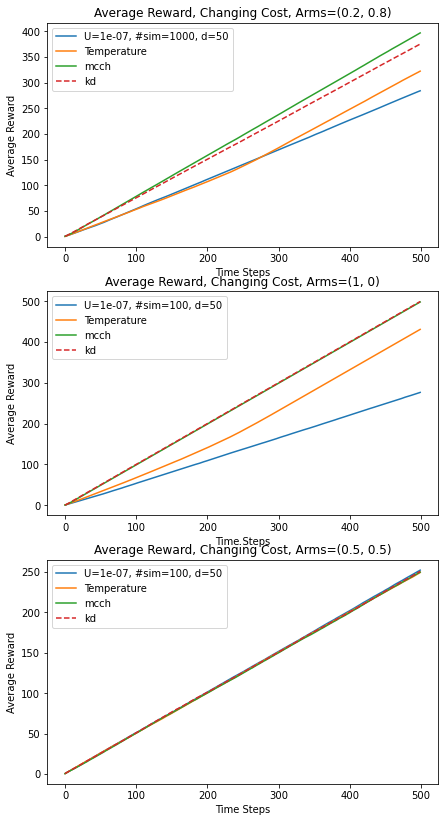

In [57]:
files = ['/*/*/*changing_cost*_02_08_*.csv', '/*/*/*changing_cost*_1_*.csv', '/*/*/*changing_cost*_05_05_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)', '(0.5, 0.5)']
rows = len(files)
title = f'Average Reward, Changing Cost, Arms='
xlabel = 'Time Steps'
ylabel = 'Average Reward'
groupedby = 'timestep'
agg_feat = 'reward'

compare_plots(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat, is_expanding=True)

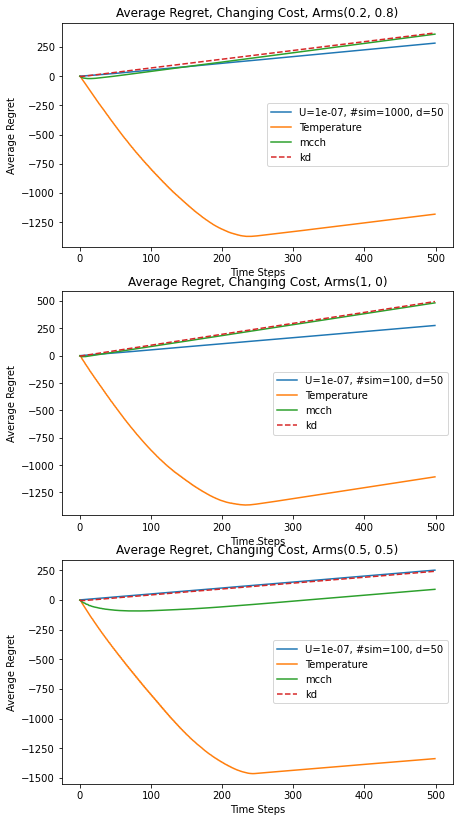

In [58]:
files = ['/*/*/*changing_cost*_02_08_*.csv', '/*/*/*changing_cost*_1_*.csv', '/*/*/*changing_cost*_05_05_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)', '(0.5, 0.5)']
rows = len(files)
title = f'Average Regret, Changing Cost, Arms'
xlabel = 'Time Steps'
ylabel = 'Average Regret'
groupedby = 'timestep'
agg_feat = 'regret'

compare_plots(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat, is_expanding=True, is_regret=True)

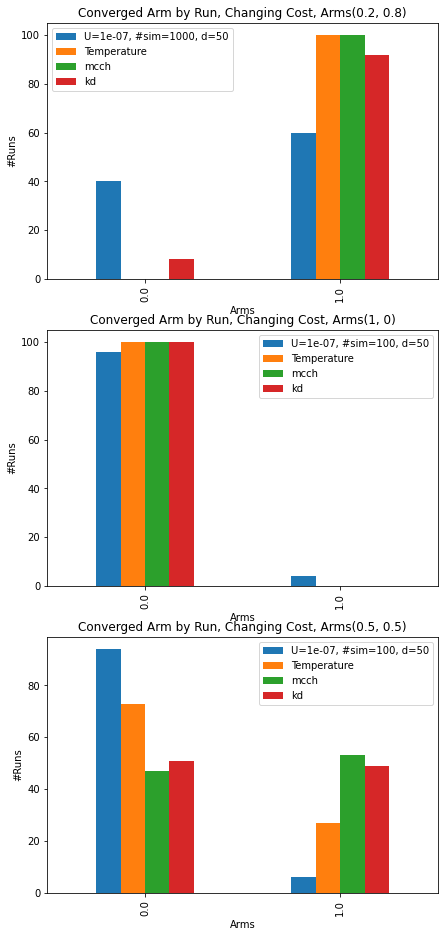

In [66]:
files = ['/*/*/*changing_cost*_02_08_*.csv', '/*/*/*changing_cost*_1_*.csv', '/*/*/*changing_cost*_05_05_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)', '(0.5, 0.5)']
rows = len(files)
title = f'Converged Arm by Run, Changing Cost, Arms'
xlabel = 'Arms'
ylabel = '#Runs'
groupedby = 'run'
agg_feat = 'chosen_arm'

compare_bars(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat)

# With Limited Temperature

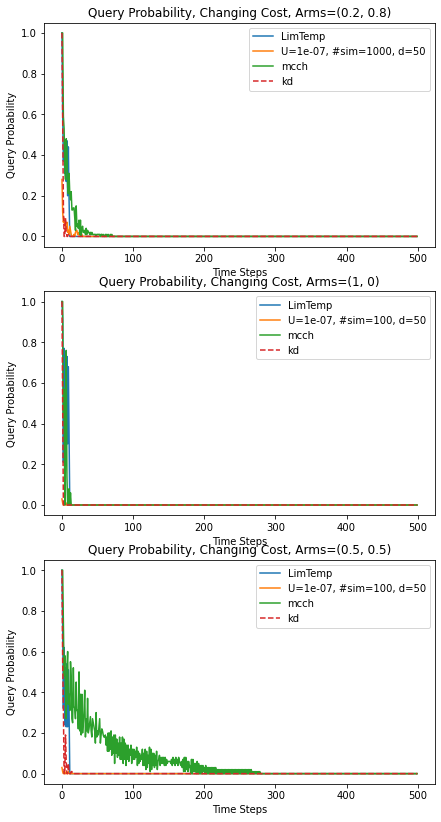

In [60]:
files = ['/*/*/*changing_cost*_02_08_*.csv', '/*/*/*changing_cost*_1_*.csv', '/*/*/*changing_cost*_05_05_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)', '(0.5, 0.5)']
rows = len(files)
title = f'Query Probability, Changing Cost, Arms='
xlabel = 'Time Steps'
ylabel = 'Query Probability'
groupedby = 'timestep'
agg_feat = 'query_ind'

compare_plots(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat)

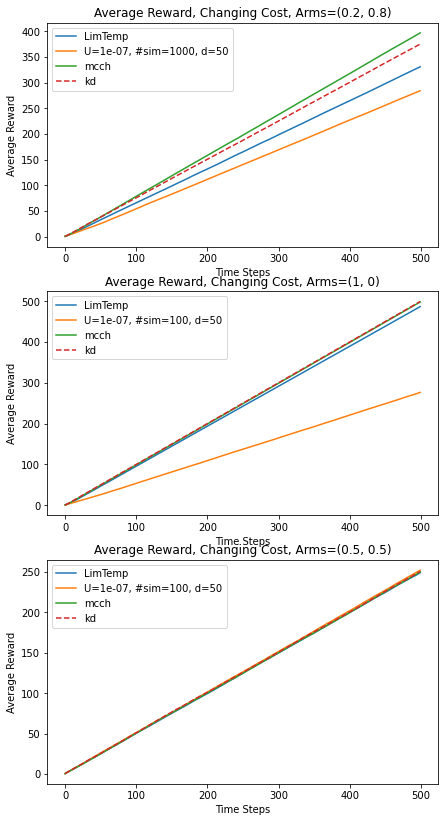

In [61]:
files = ['/*/*/*changing_cost*_02_08_*.csv', '/*/*/*changing_cost*_1_*.csv', '/*/*/*changing_cost*_05_05_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)', '(0.5, 0.5)']
rows = len(files)
title = f'Average Reward, Changing Cost, Arms='
xlabel = 'Time Steps'
ylabel = 'Average Reward'
groupedby = 'timestep'
agg_feat = 'reward'

compare_plots(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat, is_expanding=True)

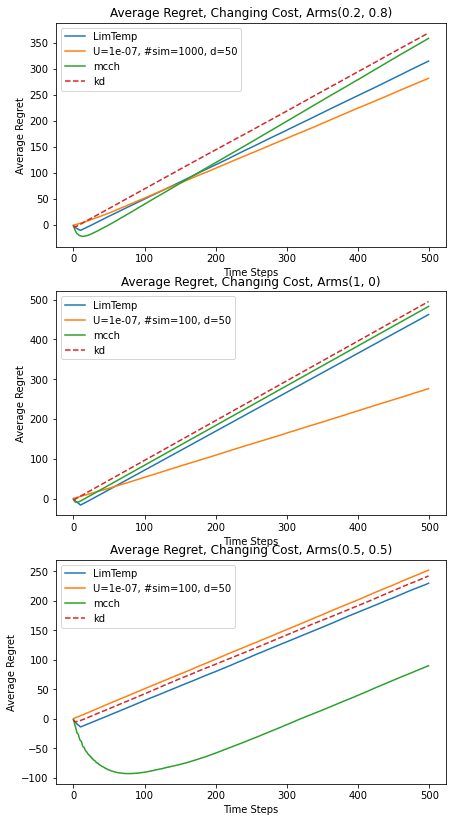

In [62]:
files = ['/*/*/*changing_cost*_02_08_*.csv', '/*/*/*changing_cost*_1_*.csv', '/*/*/*changing_cost*_05_05_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)', '(0.5, 0.5)']
rows = len(files)
title = f'Average Regret, Changing Cost, Arms'
xlabel = 'Time Steps'
ylabel = 'Average Regret'
groupedby = 'timestep'
agg_feat = 'regret'

compare_plots(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat, is_expanding=True, is_regret=True)

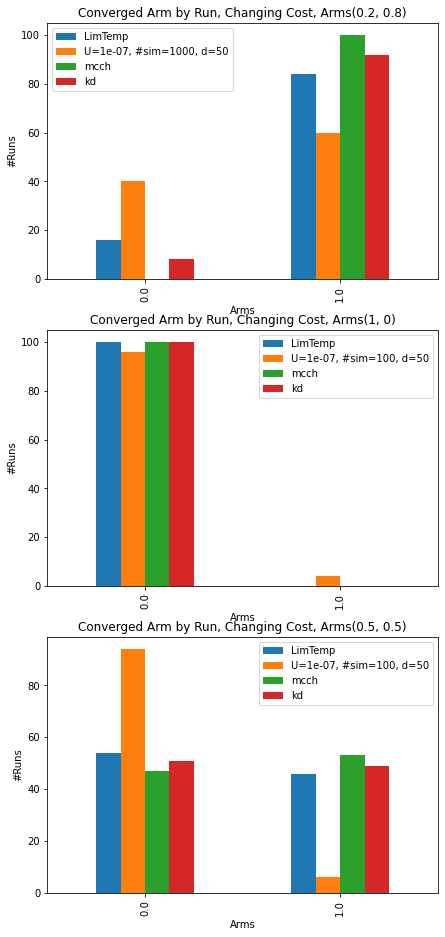

In [67]:
files = ['/*/*/*changing_cost*_02_08_*.csv', '/*/*/*changing_cost*_1_*.csv', '/*/*/*changing_cost*_05_05_*.csv']
arms = ['(0.2, 0.8)', '(1, 0)', '(0.5, 0.5)']
rows = len(files)
title = f'Converged Arm by Run, Changing Cost, Arms'
xlabel = 'Arms'
ylabel = '#Runs'
groupedby = 'run'
agg_feat = 'chosen_arm'

compare_bars(files, rows, arms, title, ylabel, xlabel, groupedby, agg_feat)